Import the necessary libraries


In [ ]:
pip install node2vec


In [169]:
import networkx as nx
import numpy as np
import itertools as it
import itertools
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
%matplotlib inline
from itertools import product
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, confusion_matrix, classification_report , recall_score, precision_score , f1_score
from itertools import product
from sklearn.metrics.pairwise import cosine_similarity
from node2vec import Node2Vec as n2v
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample, shuffle


In [170]:

def searchCommunity(dictionary,communities):
    l=[0 for i in range(len(communities))]
    c=[0 for i in range(len(communities))]
    n=[0 for i in range(len(communities))]
    for i in communities:
        for j in i:
            if dictionary[j]["value"]=="l":
                l[communities.index(i)]+=1
            elif dictionary[j]["value"]=="n":
                n[communities.index(i)]+=1
            elif dictionary[j]["value"]=="c":
                c[communities.index(i)]+=1
            else:
                continue

    purity=purityCalc(l,n,c)
    return purity

def purityCalc(l,n,c):
    purity=0
    array=[]
    summation=[]
    maximum=[]
    for i in range(len(l)):
        array.append([l[i],n[i],c[i]])
    for j in array:
        summation.append(sum(j))
        maximum.append(max(j))
    purity=sum(maximum)/sum(summation)
    return purity

Import the data \\

keep only the biggest connected component \\

create a list with the ground truth communities

In [171]:
file='/content/polbooks.gml'
H = nx.read_gml(file, label='id')
if nx.is_connected(nx.Graph(H))==False:
    G=nx.Graph(H).subgraph(max(nx.connected_components(nx.Graph(H)), key=len))
else:
    G=nx.Graph(H)
print(G.nodes())

def groundTruth(dictionary):
    clustLib=[]
    clustNeu=[]
    clustCons=[]
    for i in dictionary:
        if (dictionary[i]["value"])=="l":
            clustLib.append(i)
        elif (dictionary[i]["value"])=="n":
            clustNeu.append(i)
        else:
            clustCons.append(i)
    communities=[clustLib,clustNeu,clustCons]
    return communities

communities=groundTruth(G.nodes)

#Modularity
print('Modularity :',nx.algorithms.community.modularity(G,communities))



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104]
Modularity : 0.4149402769422207


Visualize the ground truth communities


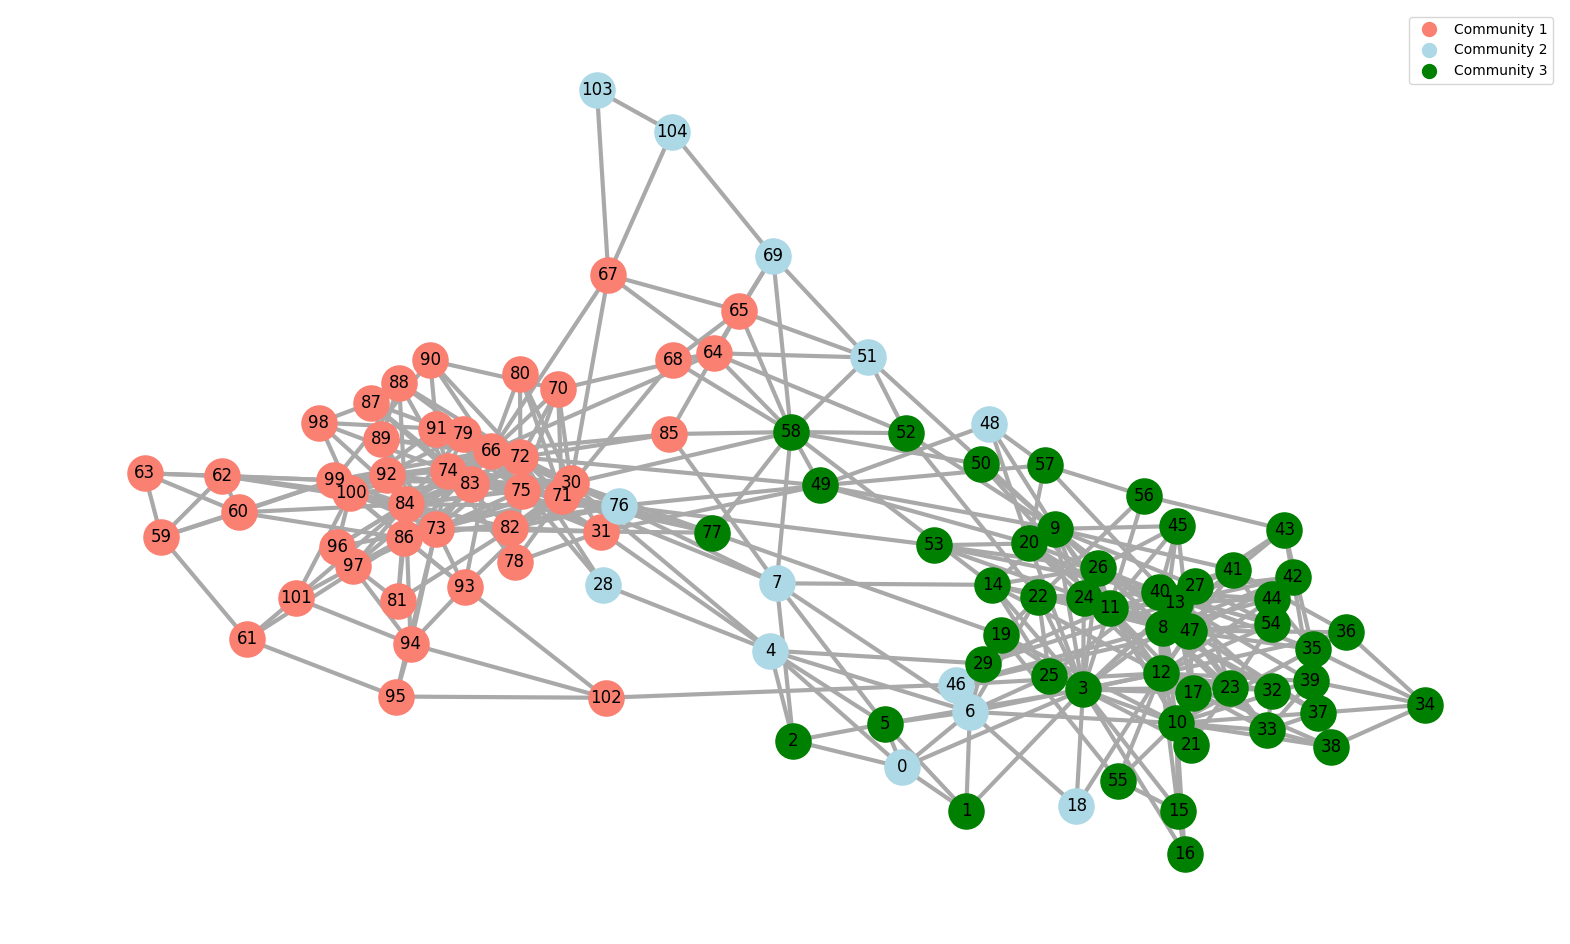

In [172]:
def plot(G,communities,colors):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(20,12))
    nx.draw_networkx_edges(G, pos=pos, width=3, edge_color='darkgray')
    for community, color in zip(communities, colors):
        nx.draw_networkx_nodes(G, pos=pos, nodelist=community, node_color=color, node_size=640)
    nx.draw_networkx_labels(G, pos=pos)
    _ = plt.axis('off')
  # Create legends
    legend_labels = [f'Community {i+1}' for i in range(len(communities))]
    legend_handles = [plt.Line2D([], [], marker='o', markersize=10, color=colors[i], linestyle='') for i in range(len(communities))]

    # Display legends
    plt.legend(legend_handles, legend_labels, loc='best')

colors=['salmon', 'lightblue', 'green']
plot(G,communities,colors)

# Node embeddings
## Node2Vec

In [173]:
node2vec1 = Node2Vec(G,dimensions=64, p=1,q=2,seed=1)
node2vec2 = Node2Vec(G, dimensions=64, p=1,q=0.5,seed=1)
node2vec3 = Node2Vec(G, dimensions=64, p=1,q=1,seed=1)

Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 20.99it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 20.46it/s]


Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 22.27it/s]


In [174]:
#function that takes a model and a graph and returns a embeddings dataframe
def model_to_dataframe(model, graph):
  emb = (
      pd.DataFrame(
          [model.wv.get_vector(str(n)) for n in graph.nodes()],
        index = graph.nodes
      )
  )
  return emb

## Node2Vec με q=2 και p=1

In [175]:
model1 = node2vec1.fit(window=10, min_count=1, batch_words=4)
emb_df1= model_to_dataframe(model1,G)
emb_df1.index.name = 'ID'
print(emb_df1.head())

          0         1         2         3         4         5         6   \
ID                                                                         
0   0.069396 -0.067567  0.027694  0.151993  0.239638 -0.323262  0.193409   
1   0.001926  0.079030  0.088749  0.124208  0.318712 -0.269130  0.095657   
2   0.183173 -0.119256  0.030580  0.207958  0.248869 -0.364876  0.056283   
3   0.023490 -0.284141 -0.210088  0.203409  0.167107 -0.298154 -0.167304   
4   0.177355  0.067271  0.049849  0.296818  0.159643 -0.362049  0.272098   

          7         8         9   ...        54        55        56        57  \
ID                                ...                                           
0   0.024355 -0.367794 -0.433901  ...  0.162180 -0.143896 -0.174277  0.067260   
1  -0.027914 -0.263101 -0.392446  ...  0.154964 -0.095444 -0.222835 -0.016210   
2  -0.023666 -0.603132 -0.308579  ... -0.031750 -0.031002 -0.067232  0.182189   
3   0.245585 -0.149815 -0.227574  ...  0.286261  0.013602 -0.1

In [176]:
#kMeans
# Convert column names to string
emb_df1.columns = emb_df1.columns.astype(str)

kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(emb_df1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [177]:
labels = kmeans1.predict(emb_df1)
emb_df1['cluster'] = labels

clusters_df1 = emb_df1['cluster']
clusters_df1 = clusters_df1.reset_index()[['ID','cluster']]
print(clusters_df1)



      ID  cluster
0      0        1
1      1        1
2      2        1
3      3        1
4      4        1
..   ...      ...
100  100        0
101  101        0
102  102        0
103  103        2
104  104        2

[105 rows x 2 columns]


##Evaluation

In [178]:
predicted1=[[],[],[]]
for i in range(len(clusters_df1['cluster'])):
    if int(clusters_df1['cluster'][i])==0:
        predicted1[0].append(int(clusters_df1['ID'][i]))
    elif int(clusters_df1['cluster'][i])==1:
        predicted1[1].append(int(clusters_df1['ID'][i]))
    else:
        predicted1[2].append(int(clusters_df1['ID'][i]))

print(predicted1)

#Modularity
print('Modularity :',nx.algorithms.community.modularity(G,predicted1))

#Purity
purity=searchCommunity(G.nodes,predicted1)
print('Purity :',purity)

[[28, 30, 31, 59, 60, 61, 62, 63, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57], [51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104]]
Modularity : 0.49863225713565856
Purity : 0.8476190476190476


## Visualization

In [ ]:
embedding = np.array(emb_df1.iloc[:,:-1].values.tolist())
ids=emb_df1.index.tolist()
node_targets = [G.nodes[int(node_id)]['value'] for node_id in ids]

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random')
node_2d_emb=tsne.fit_transform(embedding)

Text(0.5, 1.0, 'Ground Truth')

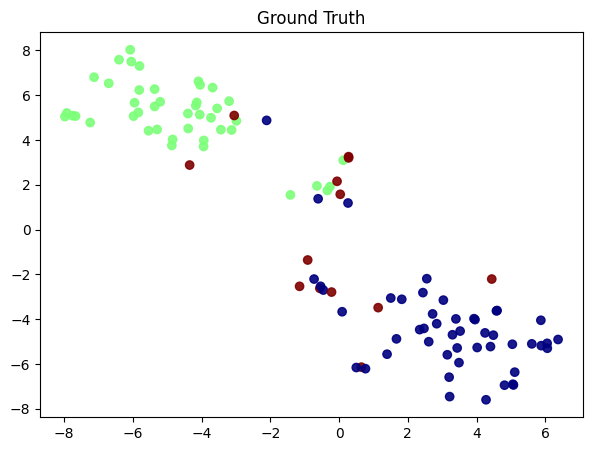

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Ground Truth')

Text(0.5, 1.0, 'Clustering')

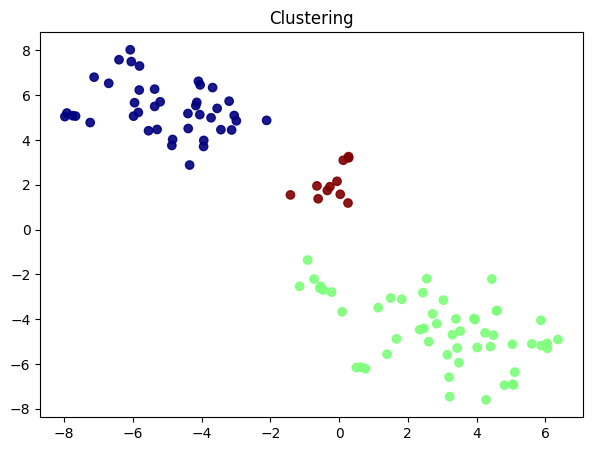

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(emb_df1['cluster']))}
node_colours = [ label_map[target] for target in emb_df1['cluster']]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Clustering')

## Node2Vec με q=0.5 και p=1

In [ ]:
model2 = node2vec2.fit(window=10, min_count=1, batch_words=4)
emb_df2= model_to_dataframe(model2,G)
emb_df2.index.name = 'ID'

#kMeans
# Convert column names to string
emb_df2.columns = emb_df2.columns.astype(str)
kmeans2 = KMeans(n_clusters=3)
kmeans2.fit(emb_df2)

labels2 = kmeans2.predict(emb_df2)
emb_df2['cluster'] = labels2

clusters_df2 = emb_df2['cluster']
clusters_df2 = clusters_df2.reset_index()[['ID','cluster']]
print(clusters_df2)

predicted2=[[],[],[]]
for i in range(len(clusters_df2['cluster'])):
    if int(clusters_df2['cluster'][i])==0:
        predicted2[0].append(int(clusters_df2['ID'][i]))
    elif int(clusters_df2['cluster'][i])==1:
        predicted2[1].append(int(clusters_df2['ID'][i]))
    else:
        predicted2[2].append(int(clusters_df2['ID'][i]))

print(predicted2)
#Modularity
print('Modularity :',nx.algorithms.community.modularity(G,predicted2))

#Purity
purity2=searchCommunity(G.nodes,predicted2)
print('Purity :',purity2)




      ID  cluster
0      0        0
1      1        0
2      2        0
3      3        0
4      4        1
..   ...      ...
100  100        1
101  101        1
102  102        1
103  103        2
104  104        2

[105 rows x 2 columns]
[[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57], [4, 28, 30, 31, 59, 60, 61, 62, 63, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], [51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104]]
Modularity : 0.49543400126490517
Purity : 0.8476190476190476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualization


Text(0.5, 1.0, 'Clustering')

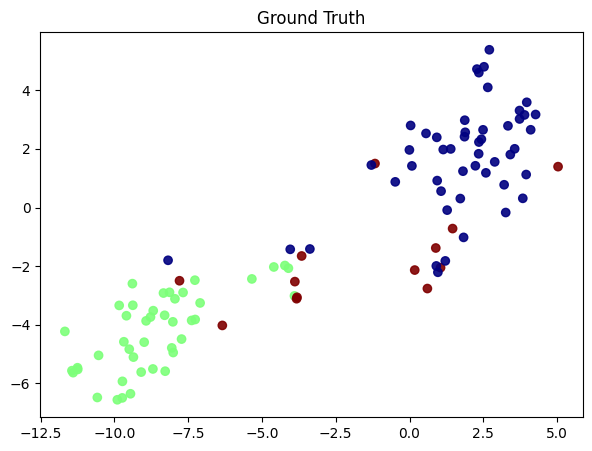

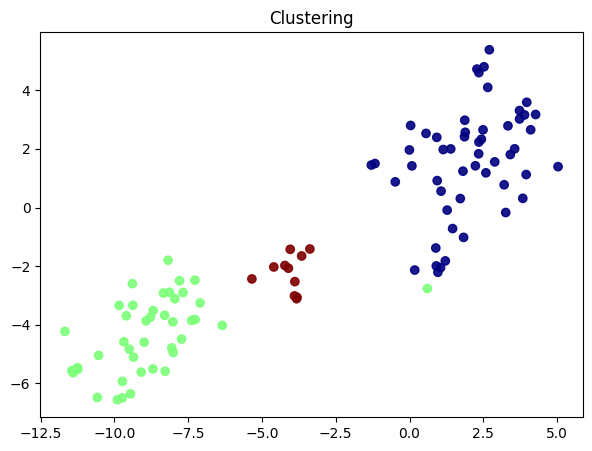

In [ ]:
embedding2 = np.array(emb_df2.iloc[:,:-1].values.tolist())
ids=emb_df2.index.tolist()
node_targets = [G.nodes[int(node_id)]['value'] for node_id in ids]

tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random')
node_2d_emb=tsne.fit_transform(embedding2)

#Ground truth
label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Ground Truth')

#Clustering
label_map = { l: i for i, l in enumerate(np.unique(emb_df2['cluster']))}
node_colours = [ label_map[target] for target in emb_df2['cluster']]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Clustering')

## Node2Vec με q=1 και p=1

In [179]:
model3 = node2vec3.fit(window=10, min_count=1, batch_words=4)
emb_df3= model_to_dataframe(model3,G)
emb_df3.index.name = 'ID'

#kMeans
# Convert column names to string
emb_df3.columns = emb_df3.columns.astype(str)
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(emb_df3)

labels3 = kmeans3.predict(emb_df3)
emb_df3['cluster'] = labels3

clusters_df3 = emb_df3['cluster']
clusters_df3 = clusters_df3.reset_index()[['ID','cluster']]
print(clusters_df3)

predicted3=[[],[],[]]
for i in range(len(clusters_df3['cluster'])):
    if int(clusters_df3['cluster'][i])==0:
        predicted3[0].append(int(clusters_df3['ID'][i]))
    elif int(clusters_df3['cluster'][i])==1:
        predicted3[1].append(int(clusters_df3['ID'][i]))
    else:
        predicted3[2].append(int(clusters_df3['ID'][i]))

print(predicted3)
#Modularity

print('Modularity :',nx.algorithms.community.modularity(G,predicted3))

#Purity
purity3=searchCommunity(G.nodes,predicted3)
print('Purity :',purity3)



      ID  cluster
0      0        1
1      1        1
2      2        1
3      3        1
4      4        1
..   ...      ...
100  100        0
101  101        0
102  102        0
103  103        2
104  104        2

[105 rows x 2 columns]
[[28, 30, 31, 59, 60, 61, 62, 63, 66, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 53, 54, 55, 56, 57], [51, 52, 58, 64, 65, 67, 68, 69, 85, 103, 104]]
Modularity : 0.49863225713565856
Purity : 0.8476190476190476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Visualization

Text(0.5, 1.0, 'Clustering')

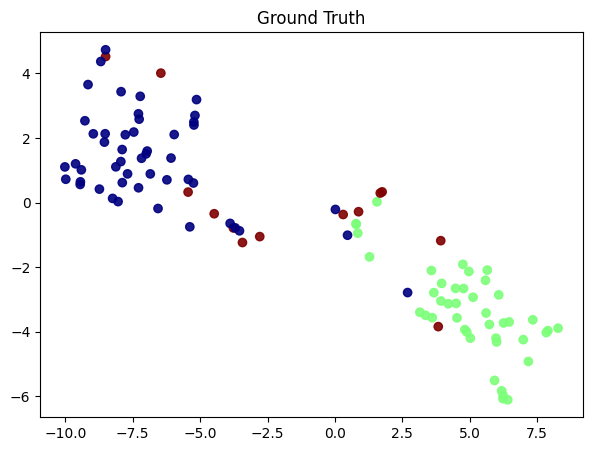

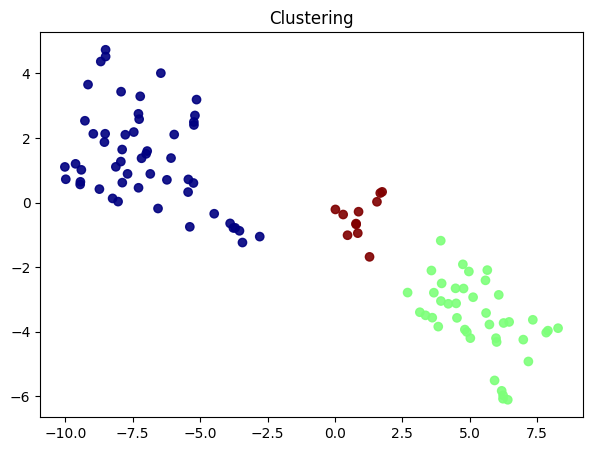

In [ ]:
embedding3 = np.array(emb_df3.iloc[:,:-1].values.tolist())
ids=emb_df3.index.tolist()
node_targets = [G.nodes[int(node_id)]['value'] for node_id in ids]

tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random')
node_2d_emb=tsne.fit_transform(embedding3)

#Ground truth
label_map = { l: i for i, l in enumerate(np.unique(node_targets))}
node_colours = [ label_map[target] for target in node_targets]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Ground Truth')

#Clustering
label_map = { l: i for i, l in enumerate(np.unique(emb_df3['cluster']))}
node_colours = [ label_map[target] for target in emb_df3['cluster']]
plt.figure(figsize=(7,5))
plt.scatter(node_2d_emb[:,0],node_2d_emb[:,1],c=node_colours, cmap="jet", alpha=0.9)
plt.title('Clustering')

## Link Prediction

In [ ]:
models=[model1,model2,model3]
for m in range(len(models)):
  print('model:',m)
  #Generating edge features and target labels
  unique_nodes = list(G.nodes())
  all_possible_edges = [(x,y) for (x,y) in product(unique_nodes, unique_nodes)]
  edge_features = [(models[m].wv.get_vector(str(i)) + models[m].wv.get_vector(str(j))) for i,j in all_possible_edges]
  edges = list(G.edges())
  is_con = [1 if e in edges else 0 for e in all_possible_edges]

  # Get the training and target data
  X = np.array(edge_features)
  y = np.array(is_con)

  # Perform undersampling to balance the classes
  # Separate the samples of the majority and minority classes
  majority_samples = X[y == 0]
  minority_samples = X[y == 1]

  # Determine the size of the minority class
  minority_size = len(minority_samples)

  # Adjust the number of samples to resample if it exceeds the minority class size
  n_samples = min(minority_size, len(majority_samples))

  # Randomly select a subset of the majority class samples
  undersampled_majority_samples = resample(majority_samples,
                                          n_samples=n_samples,
                                          replace=False,
                                          random_state=42)

  # Combine the undersampled majority class samples with the original minority class samples
  undersampled_X = np.concatenate([undersampled_majority_samples, minority_samples])
  undersampled_y = np.concatenate([np.repeat(0, n_samples), np.repeat(1, minority_size)])

  # Shuffle the undersampled data
  undersampled_X, undersampled_y = shuffle(undersampled_X, undersampled_y, random_state=42)

  # Split the undersampled data into train and test sets
  x_train, x_test, y_train, y_test = train_test_split(undersampled_X, undersampled_y, test_size=0.3)

  # GBC classifier
  clf = GradientBoostingClassifier()

  # Train the GBC model
  clf.fit(x_train, y_train)

  # Evaluate GBC model on the test set
  y_pred = clf.predict(x_test)
  test_acc = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  print('GradientBoostingClassifier')
  print("Testing Accuracy: ", test_acc)
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1 Score: ", f1)
  print("Confusion Matrix:\n", confusion)
  print("")

  # Naive Bayes
  # Train the Naive Bayes model
  naive_bayes_model = GaussianNB()
  naive_bayes_model.fit(x_train, y_train)

  # Evaluate Naive Bayes model on the test set
  y_pred = naive_bayes_model.predict(x_test)
  test_acc = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  confusion = confusion_matrix(y_test, y_pred)

  print('Naive Bayes')
  print("Testing Accuracy: ", test_acc)
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1 Score: ", f1)
  print("Confusion Matrix:\n", confusion)
  print("")


  logic_regr =LogisticRegression()
  logic_regr.fit(x_train, y_train)
  y_pred = logic_regr.predict(x_test)
  x_pred = logic_regr.predict(x_train)
  test_acc = accuracy_score(y_test, y_pred)


  print('Logistic Regression')
  print("Testing Accuracy : ", test_acc)


  recall= recall_score(y_test, y_pred)
  print('Recall',recall)

  precision= precision_score(y_test, y_pred)
  print('precision',precision)

  f1= f1_score(y_test, y_pred)
  print('f1_score',f1)

  print("Test Confusion Matrix : ")
  print(confusion_matrix(y_pred,y_test))
  print("")






model: 0
GradientBoostingClassifier
Testing Accuracy:  0.7245283018867924
Recall:  0.76
Precision:  0.6884057971014492
F1 Score:  0.7224334600760457
Confusion Matrix:
 [[97 43]
 [30 95]]

Naive Bayes
Testing Accuracy:  0.7509433962264151
Recall:  0.88
Precision:  0.6832298136645962
F1 Score:  0.7692307692307692
Confusion Matrix:
 [[ 89  51]
 [ 15 110]]

Logistic Regression
Testing Accuracy :  0.5584905660377358
Recall 0.616
precision 0.5273972602739726
f1_score 0.5682656826568266
Test Confusion Matrix : 
[[71 48]
 [69 77]]

model: 1
GradientBoostingClassifier
Testing Accuracy:  0.7509433962264151
Recall:  0.7913669064748201
Precision:  0.7482993197278912
F1 Score:  0.7692307692307693
Confusion Matrix:
 [[ 89  37]
 [ 29 110]]

Naive Bayes
Testing Accuracy:  0.6566037735849056
Recall:  0.6690647482014388
Precision:  0.6739130434782609
F1 Score:  0.671480144404332
Confusion Matrix:
 [[81 45]
 [46 93]]

Logistic Regression
Testing Accuracy :  0.5584905660377358
Recall 0.5251798561151079
pr